In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('../plotting.mplstyle')
import h5py
from matplotlib import cm
import numpy as np

blue = "#1f78b4"
green = "#33a02c"
red = "#e31a1c"

In [2]:
# Read data
hfile = h5py.File('./../data/fixed_rate_uniform.hdf','r')

# Read out joint probability distribution data
p_joint = np.array(hfile['result']['probabilities'])
kappa_dcs_2D = np.array(hfile['result']['kappa_dcs_2D'])
kappa_zs_2D = np.array(hfile['result']['kappa_zs_2D'])

# And 1D posteriors, conditional on the other parameter being zero
p_kappa_dc = np.array(hfile['result']['probability_kappa_dc_1D'])
p_kappa_z = np.array(hfile['result']['probability_kappa_z_1D'])
kappa_dcs_1D = np.array(hfile['result']['kappa_dcs_1D'])
kappa_zs_1D = np.array(hfile['result']['kappa_zs_1D'])

# Compute marginal probability distributions
p_kappa_dc_marginal = np.trapz(p_joint,axis=1)
p_kappa_dc_marginal /= np.trapz(p_kappa_dc_marginal,kappa_dcs_2D)

p_kappa_z_marginal = np.trapz(p_joint,axis=0)
p_kappa_z_marginal /= np.trapz(p_kappa_z_marginal,kappa_zs_2D)

/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_94795/1095492798.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(kappa_dcs_2D,kappa_zs_2D,p_joint.T,cmap=cmap,vmin=1e-6,zorder=1)


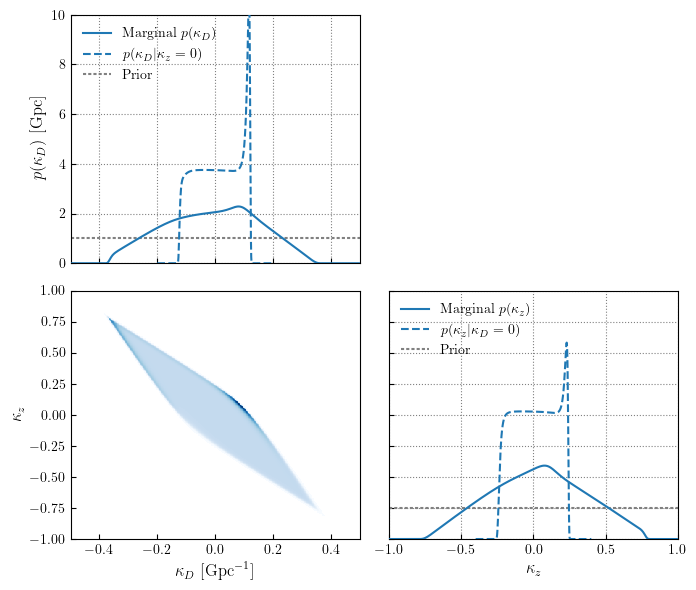

In [18]:
fig = plt.figure(figsize=(7,6))

ax = fig.add_subplot(223)
ax.set_rasterization_zorder(2)
cmap = cm.Blues
cmap.set_under("white")
c = ax.pcolormesh(kappa_dcs_2D,kappa_zs_2D,p_joint.T,cmap=cmap,vmin=1e-6,zorder=1)
ax.set_xlabel('$\kappa_D$ [$\mathrm{Gpc}^{-1}$]')
ax.set_ylabel('$\kappa_z$')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-1.,1.)

ax = fig.add_subplot(221)
ax.plot(kappa_dcs_2D,p_kappa_dc_marginal,color=blue,label="Marginal $p(\kappa_D)$",zorder=3)
ax.plot(kappa_dcs_1D,p_kappa_dc,color=blue,ls='--',label="$p(\kappa_D|\kappa_z=0)$",zorder=4)
ax.plot([-0.5,0.5],[1.,1.],color='grey',dashes=(1.5,1),label="Prior",zorder=2)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(0,10)
ax.set_xticklabels([])
ax.set_ylabel('$p(\kappa_D)$ [$\mathrm{Gpc}$]')
ax.legend(loc='upper left')

ax = fig.add_subplot(224)
ax.plot(kappa_zs_2D,p_kappa_z_marginal,color=blue,label="Marginal $p(\kappa_z)$",zorder=3)
ax.plot(kappa_zs_1D,p_kappa_z,color=blue,ls='--',label="$p(\kappa_z|\kappa_D=0)$",zorder=4)
ax.plot([-1,1],[0.5,0.5],color='grey',dashes=(1.5,1),label="Prior",zorder=2)
ax.set_xlim(-1,1)
ax.set_ylim(0,4)
ax.set_yticklabels([])
ax.set_xlabel('$\kappa_z$')
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('uniformRate_corner.pdf',bbox_inches='tight',dpi=200)
plt.show()

In [18]:
# Compute CDFs and get point estimates and uncertainties
cdf_kd_marginal = np.cumsum(p_kappa_dc_marginal)/np.sum(p_kappa_dc_marginal)
cdf_kz_marginal = np.cumsum(p_kappa_z_marginal)/np.sum(p_kappa_z_marginal)
cdf_kd_1D = np.cumsum(p_kappa_dc)/np.sum(p_kappa_dc)
cdf_kz_1D = np.cumsum(p_kappa_z)/np.sum(p_kappa_z)

In [26]:
def get_values(kappas,cdfs):
    
    kappa_05 = np.interp(0.05,cdfs,kappas)
    kappa_50 = np.interp(0.50,cdfs,kappas)
    kappa_95 = np.interp(0.95,cdfs,kappas)
    
    return kappa_50,kappa_95-kappa_50,kappa_50-kappa_05

In [31]:
# Save our fitting results
with open('./uniformRate_results.txt','w') as macrofile:
    
    macrofile.write("\\newcommand{{\\UniformRateKappaDcMarginal}}{{{0:.2f}^{{+{1:.2f}}}_{{-{2:.2f}}}}}".\
                    format(*get_values(kappa_dcs_2D,cdf_kd_marginal)))
    macrofile.write("\n")

    macrofile.write("\\newcommand{{\\UniformRateKappaZMarginal}}{{{0:.2f}^{{+{1:.2f}}}_{{-{2:.2f}}}}}".\
                    format(*get_values(kappa_zs_2D,cdf_kz_marginal)))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\UniformRateKappaDcConditioned}}{{{0:.2f}^{{+{1:.2f}}}_{{-{2:.2f}}}}}".\
                    format(*get_values(kappa_dcs_1D,cdf_kd_1D)))
    macrofile.write("\n")

    macrofile.write("\\newcommand{{\\UniformRateKappaZConditioned}}{{{0:.2f}^{{+{1:.2f}}}_{{-{2:.2f}}}}}".\
                    format(*get_values(kappa_zs_1D,cdf_kz_1D)))
    macrofile.write("\n")

/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_20612/1945723486.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(kappa_dcs_2D,kappa_zs_2D,p_joint.T,cmap=cmap,vmin=1e-6,zorder=1)


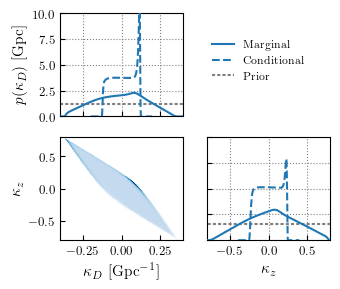

In [8]:
fig = plt.figure(figsize=(3.5,3))

ax = fig.add_subplot(223)
ax.set_rasterization_zorder(2)
cmap = cm.Blues
cmap.set_under("white")
c = ax.pcolormesh(kappa_dcs_2D,kappa_zs_2D,p_joint.T,cmap=cmap,vmin=1e-6,zorder=1)
ax.set_xlabel('$\kappa_D$ [$\mathrm{Gpc}^{-1}$]',fontsize=11)
ax.set_ylabel('$\kappa_z$',fontsize=11)
ax.set_xlim(-0.4,0.4)
ax.set_ylim(-0.8,0.8)
ax.tick_params(axis='both', which='major', labelsize=9)

ax = fig.add_subplot(221)
ax.plot(kappa_dcs_2D,p_kappa_dc_marginal,color=blue,label="Marginal",zorder=3)
ax.plot(kappa_dcs_1D,p_kappa_dc,color=blue,ls='--',label="Conditional",zorder=4)
ax.plot([-0.4,0.4],[1./0.8,1./0.8],color='grey',dashes=(1.5,1),label="Prior",zorder=2)
ax.set_xlim(-0.4,0.4)
ax.set_ylim(0,10)
ax.set_xticklabels([])
ax.tick_params(axis='both', which='major', labelsize=9)
ax.set_ylabel('$p(\kappa_D)$ [$\mathrm{Gpc}$]',fontsize=11)
ax.legend(fontsize=8,loc=(1.2,0.3))

ax = fig.add_subplot(224)
ax.plot(kappa_zs_2D,p_kappa_z_marginal,color=blue,label="Marginal $p(\kappa_z)$",zorder=3)
ax.plot(kappa_zs_1D,p_kappa_z,color=blue,ls='--',label="$p(\kappa_z|\kappa_D=0)$",zorder=4)
ax.plot([-1,1],[1/1.6,1/1.6],color='grey',dashes=(1.5,1),label="Prior",zorder=2)
ax.set_xlim(-0.8,0.8)
ax.set_ylim(0,4)
ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', labelsize=9)
ax.set_xlabel('$\kappa_z$',fontsize=11)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.2)
plt.savefig('uniformRate_corner_tiny.pdf',bbox_inches='tight',dpi=200)
plt.show()